In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'../data/car-evaluation_preprocessed.csv', sep=',')

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [5]:
data["class"].unique()

array([1, 2, 4, 3], dtype=int64)

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 6].values

In [7]:
print(X)
print(y)

[[4 4 2 2 1 1]
 [4 4 2 2 1 2]
 [4 4 2 2 1 3]
 ...
 [1 1 5 5 3 1]
 [1 1 5 5 3 2]
 [1 1 5 5 3 3]]
[1 1 1 ... 1 3 4]


Разбивка выборки

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[248   1   0   0]
 [  4  66   0   1]
 [  0   1  10   0]
 [  0   2   0  13]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       249
           2       0.94      0.93      0.94        71
           3       1.00      0.91      0.95        11
           4       0.93      0.87      0.90        15

    accuracy                           0.97       346
   macro avg       0.96      0.93      0.94       346
weighted avg       0.97      0.97      0.97       346



Один из способов найти наилучшее значение K - построить график значения K и соответствующей частоты ошибок для набора данных.

В этом разделе мы построим график средней ошибки для предсказанных значений тестового набора для всех значений K от 1 до 40. Для этого давайте сначала вычислим среднее значение ошибки для всех прогнозируемых значений, где K находится в диапазоне от 1 до 40.

In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

На каждой итерации вычисляется средняя ошибка для предсказанных значений тестового набора, и результат добавляется в error список.Следующим шагом будет построение графика зависимости errorзначений от K.

Text(0, 0.5, 'Mean Error')

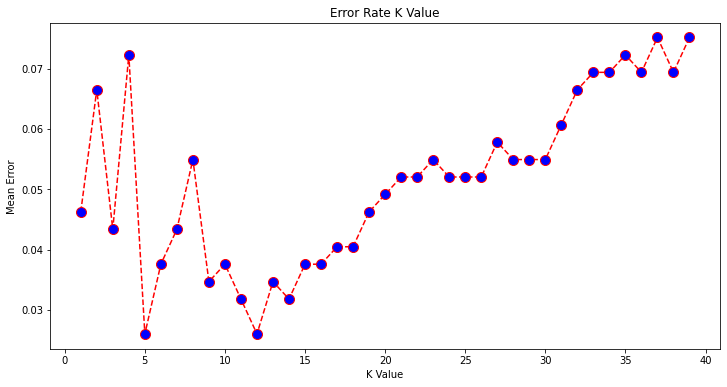

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

На графике видно, что минимальная ошибка при K = 3.

# DTC

In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [17]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[248   1   0   0]
 [  1  70   0   0]
 [  0   0  11   0]
 [  0   1   0  14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       249
           2       0.97      0.99      0.98        71
           3       1.00      1.00      1.00        11
           4       1.00      0.93      0.97        15

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346



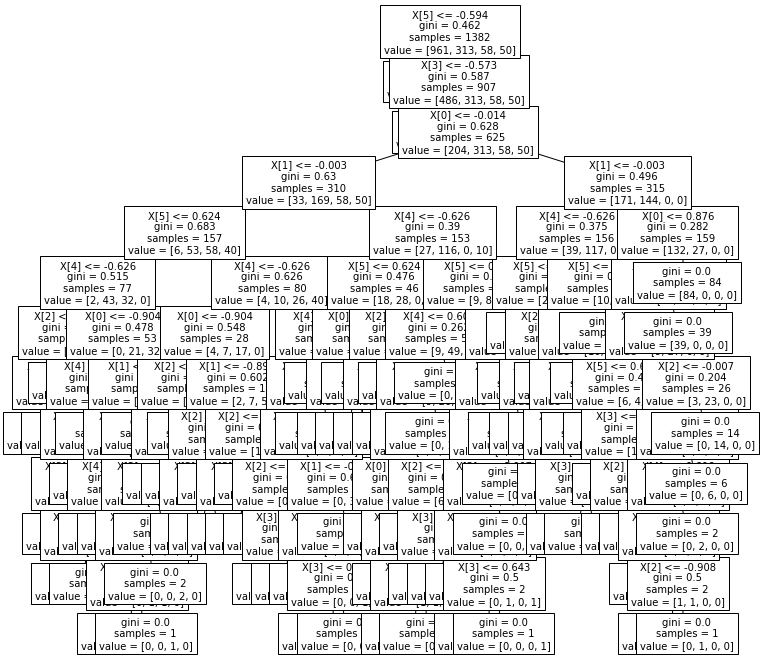

In [19]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10)
plt.show()

# NB

In [20]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[235   7   1   6]
 [ 19  22   1  29]
 [  0   4   3   4]
 [  0   0   0  15]]
              precision    recall  f1-score   support

           1       0.93      0.94      0.93       249
           2       0.67      0.31      0.42        71
           3       0.60      0.27      0.37        11
           4       0.28      1.00      0.43        15

    accuracy                           0.79       346
   macro avg       0.62      0.63      0.54       346
weighted avg       0.83      0.79      0.79       346



# SVM

In [22]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [23]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[245   4   0   0]
 [  3  68   0   0]
 [  0   0  11   0]
 [  0   0   1  14]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       249
           2       0.94      0.96      0.95        71
           3       0.92      1.00      0.96        11
           4       1.00      0.93      0.97        15

    accuracy                           0.98       346
   macro avg       0.96      0.97      0.96       346
weighted avg       0.98      0.98      0.98       346



# LR

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'lbfgs', max_iter = 400)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [25]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[241   7   1   0]
 [ 24  45   1   1]
 [  0   5   6   0]
 [  0   4   0  11]]
              precision    recall  f1-score   support

           1       0.91      0.97      0.94       249
           2       0.74      0.63      0.68        71
           3       0.75      0.55      0.63        11
           4       0.92      0.73      0.81        15

    accuracy                           0.88       346
   macro avg       0.83      0.72      0.77       346
weighted avg       0.87      0.88      0.87       346

